<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-cyber-data-alchemist/blob/main/Actividad_Semanal_6_A01793023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

<br>
<p align=center>Instituto Tecnológico y de Estudios Superiores de Monterrey</p>
<p align=center>Escuela de Ingeniería y Ciencias</p>
<p align=center>Maestría en Inteligencia Artificial Aplicada (MNA)</p>
<p align=center>TC4029. Ciencia y Analítica de Datos</p>
<p align=center>Actividad semana 6 - Visualización</p>
<p align=center>Profesor Titular: María de la Paz Rico Fernández</p>
<p align=center>Presenta:</p>
<p align=center>A01793023 | Jorge Luis Arroyo Chavelas</p>
<p align=center>1 de Noviembre de 2022</p>
<br>

Link a GitHub:

https://github.com/PosgradoMNA/actividades-de-aprendizaje-cyber-data-alchemist/blob/main/Actividad_Semanal_6_A01793023.ipynb


---



##### Ejercicio 1
*Descarga los [datos](https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv) y carga el dataset en tu libreta. Descripción [aquí](https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/dataset_info.txt).*

In [1]:
#################################################
# Preparemos el ambiente:
#################################################

# Para abrir urls:
import requests

# Para manipular datos:
import pandas as pd
import numpy as np

# Para transformaciones:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer

# Para pipelines:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

# Para PCA:
from sklearn.decomposition import PCA

# Para visualizaciones:
from tabulate import tabulate
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams["axes.formatter.limits"] = (-5, 12)

In [2]:
#################################################
# Llamemos los datos:
#################################################

# Definimos url donde están los datos:
dataset_url = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'

# Leemos el dataset:
df = pd.read_csv(dataset_url)

print(f"""
┌────────────────────────────────────────────────────────┐
│Ejercicio 1 - Llamar los datos:                         │
└────────────────────────────────────────────────────────┘
dataset obtenido: {type(df)}
""")


┌────────────────────────────────────────────────────────┐
│Ejercicio 1 - Llamar los datos:                         │
└────────────────────────────────────────────────────────┘
dataset obtenido: <class 'pandas.core.frame.DataFrame'>



Antes de comenzar con el análisis de los datos mismos, consultemos la información del dataset.

In [3]:
#################################################
# Consultar headers:
#################################################

# Definimos url donde podemos encontrar la información de los datos:
info_url = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/dataset_info.txt'

# Obtenemos el archivo:
info_response = requests.get(info_url)

# Guardamos el archivo en nuestro ambiente:
open("dataset_info.txt", "wb").write(info_response.content)
info_path = './dataset_info.txt'

print(f"""
┌────────────────────────────────────────────────────────┐
│Ejercicio 1 - Consultar información de los datos:       │
└────────────────────────────────────────────────────────┘
""")
# Leemos el archivo:
with open(info_path, "r") as f:
  # Leemos la información relevante:
  file_stuff = f.readlines()[6:16]
  for i in file_stuff:
    print(i)


┌────────────────────────────────────────────────────────┐
│Ejercicio 1 - Consultar información de los datos:       │
└────────────────────────────────────────────────────────┘



This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 

X2: Gender (1 = male; 2 = female). 

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 

X4: Marital status (1 = married; 2 = single; 3 = others). 

X5: Age (year). 

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scal

Con esto podemos generar un conjunto de nombres de variables de mejor significado y aplicarlo a nuestro dataset.

In [4]:
#################################################
# Crear headers:
#################################################

# Headers basados en la información:
colnames = [
    "ID",
     "credit_amt",
      "gender",
      "education",
      "marital_status",
      "age",
      "pay_stat_sep",
      "pay_stat_aug",
      "pay_stat_jul",
      "pay_stat_jun",
      "pay_stat_may",
      "pay_stat_apr",
      "bill_amt_sep",
      "bill_amt_aug",
      "bill_amt_jul",
      "bill_amt_jun",
      "bill_amt_may",
      "bill_amt_apr",
      "pay_amt_sep",
      "pay_amt_aug",
      "pay_amt_jul",
      "pay_amt_jun",
      "pay_amt_may",
      "pay_amt_apr",
      "proba_def"
  ]
df.columns = colnames

##### Ejercicio 2
*Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()*

In [5]:
#################################################
# Ver la forma del dataset:
#################################################

print(f"""
┌────────────────────────────────────────────────────────┐
│Ejercicio 2 - Forma del dataframe:                      │
└────────────────────────────────────────────────────────┘
Forma del dataset: {df.shape}
""")


┌────────────────────────────────────────────────────────┐
│Ejercicio 2 - Forma del dataframe:                      │
└────────────────────────────────────────────────────────┘
Forma del dataset: (30000, 25)



Tenemos un dataset con 30000 observaciones y 25 columnas, de las cuales 23 son features, una es un ID y otra es una variable objetivo para modelos de aprendizaje automático.

In [6]:
#################################################
# Ver las columnas del dataset:
#################################################
print(f"""
┌────────────────────────────────────────────────────────┐
│Ejercicio 2 - Mejorar las columnas:                     │
└────────────────────────────────────────────────────────┘
Columnas del dataset: {df.columns}
""")


┌────────────────────────────────────────────────────────┐
│Ejercicio 2 - Mejorar las columnas:                     │
└────────────────────────────────────────────────────────┘
Columnas del dataset: Index(['ID', 'credit_amt', 'gender', 'education', 'marital_status', 'age',
       'pay_stat_sep', 'pay_stat_aug', 'pay_stat_jul', 'pay_stat_jun',
       'pay_stat_may', 'pay_stat_apr', 'bill_amt_sep', 'bill_amt_aug',
       'bill_amt_jul', 'bill_amt_jun', 'bill_amt_may', 'bill_amt_apr',
       'pay_amt_sep', 'pay_amt_aug', 'pay_amt_jul', 'pay_amt_jun',
       'pay_amt_may', 'pay_amt_apr', 'proba_def'],
      dtype='object')



In [7]:
#################################################
# Explorar los datos:
#################################################
print(f"""
┌────────────────────────────────────────────────────────┐
│Ejercicio 2 - Vista rápida de los datos:                │
└────────────────────────────────────────────────────────┘
""")
df.head()


┌────────────────────────────────────────────────────────┐
│Ejercicio 2 - Vista rápida de los datos:                │
└────────────────────────────────────────────────────────┘



,ID,credit_amt,gender,education,marital_status,age,pay_stat_sep,pay_stat_aug,pay_stat_jul,pay_stat_jun,...,bill_amt_jun,bill_amt_may,bill_amt_apr,pay_amt_sep,pay_amt_aug,pay_amt_jul,pay_amt_jun,pay_amt_may,pay_amt_apr,proba_def
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


Observamos peculariedades como que existen variables categoricos con valores numéricos, esto probablemente cree confusiones en el dataset; lo arregalaremos con selección de las variables.

In [8]:
#################################################
# Info de los datos:
#################################################
print(f"""
┌────────────────────────────────────────────────────────┐
│Ejercicio 2 - Información rápida de los datos:          │
└────────────────────────────────────────────────────────┘
""")
df.info()


┌────────────────────────────────────────────────────────┐
│Ejercicio 2 - Información rápida de los datos:          │
└────────────────────────────────────────────────────────┘

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              30000 non-null  int64  
 1   credit_amt      30000 non-null  int64  
 2   gender          29999 non-null  float64
 3   education       29998 non-null  float64
 4   marital_status  29998 non-null  float64
 5   age             29995 non-null  float64
 6   pay_stat_sep    29997 non-null  float64
 7   pay_stat_aug    29995 non-null  float64
 8   pay_stat_jul    29993 non-null  float64
 9   pay_stat_jun    29991 non-null  float64
 10  pay_stat_may    29984 non-null  float64
 11  pay_stat_apr    29986 non-null  float64
 12  bill_amt_sep    29989 non-null  float64
 13  bill_amt_aug    29989 non-null  

Comprobamos que variables como género o estatus cívil se encuentran clasificadas como flotantes, estas son las variables (y otras) son las que debemos tener cuidado.

In [9]:
#################################################
# Validar si existen nulos:
#################################################
print(f"""
┌────────────────────────────────────────────────────────┐
│Ejercicio 2 - Verificar si hay nulos:                   │
└────────────────────────────────────────────────────────┘
""")
df.isna().sum()


┌────────────────────────────────────────────────────────┐
│Ejercicio 2 - Verificar si hay nulos:                   │
└────────────────────────────────────────────────────────┘



ID                 0
credit_amt         0
gender             1
education          2
marital_status     2
age                5
pay_stat_sep       3
pay_stat_aug       5
pay_stat_jul       7
pay_stat_jun       9
pay_stat_may      16
pay_stat_apr      14
bill_amt_sep      11
bill_amt_aug      11
bill_amt_jul      13
bill_amt_jun      15
bill_amt_may      17
bill_amt_apr      10
pay_amt_sep        8
pay_amt_aug        9
pay_amt_jul        8
pay_amt_jun       11
pay_amt_may       11
pay_amt_apr        5
proba_def          3
dtype: int64

Efectivamente encontramos nulos en algunas variables.

In [10]:
#################################################
# Observar el tipo de datos:
#################################################
print(f"""
┌────────────────────────────────────────────────────────┐
│Ejercicio 2 - Verificar dtypes:                         │
└────────────────────────────────────────────────────────┘
""")
df.dtypes


┌────────────────────────────────────────────────────────┐
│Ejercicio 2 - Verificar dtypes:                         │
└────────────────────────────────────────────────────────┘



ID                  int64
credit_amt          int64
gender            float64
education         float64
marital_status    float64
age               float64
pay_stat_sep      float64
pay_stat_aug      float64
pay_stat_jul      float64
pay_stat_jun      float64
pay_stat_may      float64
pay_stat_apr      float64
bill_amt_sep      float64
bill_amt_aug      float64
bill_amt_jul      float64
bill_amt_jun      float64
bill_amt_may      float64
bill_amt_apr      float64
pay_amt_sep       float64
pay_amt_aug       float64
pay_amt_jul       float64
pay_amt_jun       float64
pay_amt_may       float64
pay_amt_apr       float64
proba_def         float64
dtype: object

Aquí visualizamos otra vez que el conjunto está ya optimizado a datos numéricos, es entonces nuestro deber sólo no aplicar métodos numéricos a aquellos datos que no lo sean: gender, education, martial_status.

##### Ejercicio 3
*Limpia los datos eliminando los registros nulos o rellena con la media de la columna*

Antes de realizar esto, vamos a dividir nuestro dataset en dos conjuntos: [X,y] con las columnas independientes y nuestra columna objetivo. Esto podría ser conveniente si queremos ampliar el proceso a un modelo de aprendizaje automático; podriamos dividir los datos en entrenamiento y prueba y además crear pipelines para evitar filtrado de información con mínimos cambios en el código, adicional, eliminemos ID ya que no es una variable per se.

In [11]:
#############################################################
# Dividir los datos en X, y
#############################################################
X = df.drop(['ID', 'proba_def'], axis=1)
y = df[['proba_def']]

In [12]:
#############################################################
# Pipeline de imputación para datos nulos:
#############################################################

# Si existen nulos, pondremos la moda:
pipeline_category = Pipeline(steps = [
    ('input_category', SimpleImputer(strategy='most_frequent')),
])
# aplicable a:
columns_category = [
    'gender', 'education', 'marital_status', 'pay_stat_sep', 'pay_stat_aug', 'pay_stat_jul', 'pay_stat_jun', 'pay_stat_may', 'pay_stat_apr',
]

# Si existen nulos, pondremos la media:
pipeline_numeric = Pipeline(steps = [
    ('input_numeric', SimpleImputer(strategy='mean'))
])
# aplicable a:
columns_numeric = [
    'credit_amt', 'age', 'bill_amt_sep', 'bill_amt_aug', 'bill_amt_jul', 'bill_amt_jun', 'bill_amt_may', 'bill_amt_apr', 'pay_amt_sep', 'pay_amt_aug', 'pay_amt_jul', 'pay_amt_jun', 'pay_amt_may', 'pay_amt_apr'
]

# definir tipos de transformaciones:
ct_estrategias = [     
    ('pipeline_category', pipeline_category, columns_category),
    ('pipeline_numeric', pipeline_numeric, columns_numeric),
]

# crear una instancia para transformar:
ct_na = ColumnTransformer(ct_estrategias, remainder='passthrough')

In [13]:
#############################################################
# Llenar los datos:
#############################################################

# Abramos y entrenemos instancia con los datos X:
X_transformer = ct_na.fit(X)

# Utilizando nuestro transformer hagamos el input a X:
X_new = pd.DataFrame(X_transformer.transform(X), columns=columns_category + columns_numeric)

# Reordenemos las columnas:
X_new = X_new[X.columns]

print(f"""
┌────────────────────────────────────────────────────────┐
│Ejercicio 3 - Verificar que ya no tenemos nulos:        │
└────────────────────────────────────────────────────────┘
""")
X_new.isna().sum()


┌────────────────────────────────────────────────────────┐
│Ejercicio 3 - Verificar que ya no tenemos nulos:        │
└────────────────────────────────────────────────────────┘



credit_amt        0
gender            0
education         0
marital_status    0
age               0
pay_stat_sep      0
pay_stat_aug      0
pay_stat_jul      0
pay_stat_jun      0
pay_stat_may      0
pay_stat_apr      0
bill_amt_sep      0
bill_amt_aug      0
bill_amt_jul      0
bill_amt_jun      0
bill_amt_may      0
bill_amt_apr      0
pay_amt_sep       0
pay_amt_aug       0
pay_amt_jul       0
pay_amt_jun       0
pay_amt_may       0
pay_amt_apr       0
dtype: int64

Utilizando este pipeline, además de ya no tener datos nulos, nos aseguramos de tener una instancia **X_transformer** con posibilidad de transformar otros conjuntos y evitar filtrado de datos hacia nuestra estrategia de imputación, esto es: las modas y medias que va a llenar serán estrictamente basadas en lo que entreno.

Aquí es importante aclrar que se uso moda para algunos datos que no son númericos; ya que pese a que los datos son números esto es realmente un enmascarado ya que no existen genero 1, 2 y por sobre esto no es posible realizar matemáticas con esto, esto es: son categóricas.


##### Ejercicio 4
*Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión*

In [14]:
#############################################################
# Describe y estadísticas:
#############################################################

print(f"""
┌────────────────────────────────────────────────────────┐
│Ejercicio 4 - Obtener describe y estadísticos:          │
└────────────────────────────────────────────────────────┘
""")
X_new[columns_numeric].describe().T.applymap('{:,.0f}'.format)


┌────────────────────────────────────────────────────────┐
│Ejercicio 4 - Obtener describe y estadísticos:          │
└────────────────────────────────────────────────────────┘



,count,mean,std,min,25%,50%,75%,max
credit_amt,"30,000","167,484","129,748","10,000","50,000","140,000","240,000","1,000,000"
age,"30,000",35,9,21,28,34,41,79
bill_amt_sep,"30,000","51,237","73,632","-165,580","3,567","22,400","67,091","964,511"
bill_amt_aug,"30,000","49,191","71,170","-69,777","2,987","21,228","64,006","983,931"
bill_amt_jul,"30,000","47,025","69,346","-157,264","2,675","20,108","60,165","1,664,089"
bill_amt_jun,"30,000","43,276","64,329","-170,000","2,332","19,066","54,506","891,586"
bill_amt_may,"30,000","40,324","60,793","-81,334","1,770","18,123","50,177","927,171"
bill_amt_apr,"30,000","38,881","59,551","-339,603","1,258","17,100","49,198","961,664"
pay_amt_sep,"30,000","5,663","16,562",0,"1,000","2,100","5,007","873,552"
pay_amt_aug,"30,000","5,922","23,041",0,836,"2,010","5,000","1,684,259"


Observamos que existe coherencia entre los datos de estado de cuenta (bill_amt) y pagos (pay_amt), estos se comportan coherentees mostrando valores similares entre los meses, lo que hace sentido con la intuición.

En particular y a groso modo, observamos:

* Montos del crédito entre 10k y 1M, con una media de 167,484 y una desviación estándar de 129,748.

* La dead de quienes tienen el crédito está en promedio en los 35 años con una desviación de 9 años; observamos edades desde los 21 hasta los 79.

* Los montos de estado de cuenta se encuentran entre los pocos miles y hasta el millón (Julio en particular observa casi 1.7M), tenemos un promedio cerca a los 40K y desviaciones estádar de 70k.

* En cuanto a los pagos observamos pagos desde los cientos hasta el millon en agosto (probablemente relacionado al pago de Julio). Los montos promedio de pago son 5k y tienen desviaciones por los 17k.




##### Ejercicio 5
*Realiza el conteo de las variables categóricas*

In [15]:
#############################################################
# Describe y estadísticas:
#############################################################

print(f"""
┌────────────────────────────────────────────────────────┐
│Ejercicio 5 - Obtener valores en datos categóricos:     │
└────────────────────────────────────────────────────────┘
""")
for column in columns_category:
  print(f"{column}")
  print(tabulate(
      pd.DataFrame(X_new[column].value_counts(dropna=False).sort_index()).T,
      headers = 'keys',
      tablefmt = 'psql')
  )
  print("\n")


┌────────────────────────────────────────────────────────┐
│Ejercicio 5 - Obtener valores en datos categóricos:     │
└────────────────────────────────────────────────────────┘

gender
+--------+-------+-------+
|        |   1.0 |   2.0 |
|--------+-------+-------|
| gender | 11887 | 18113 |
+--------+-------+-------+


education
+-----------+-------+-------+-------+-------+-------+-------+-------+
|           |   0.0 |   1.0 |   2.0 |   3.0 |   4.0 |   5.0 |   6.0 |
|-----------+-------+-------+-------+-------+-------+-------+-------|
| education |    14 | 10585 | 14032 |  4915 |   123 |   280 |    51 |
+-----------+-------+-------+-------+-------+-------+-------+-------+


marital_status
+----------------+-------+-------+-------+-------+
|                |   0.0 |   1.0 |   2.0 |   3.0 |
|----------------+-------+-------+-------+-------|
| marital_status |    54 | 13657 | 15966 |   323 |
+----------------+-------+-------+-------+-------+


pay_stat_sep
+--------------+--------+-----

De lo más rescatable, dada su importancia a la probabilidad de caer en impago, es que la mayoría de los créditos se encuetran pagaods el mismo mes (clave 0).

##### Ejercicio 6
*Escala los datos, si consideras necesario*

Antes de aplicar un PCA necesitamos escalar los datos por PCA, ya que esto es un supuesto del modelo. Para hacer esto, podemos ampliar nuestro pipeline descrito antes para evitar filtrado de datos:

In [16]:
#############################################################
# Pipeline de imputación para datos nulos y normalización:
#############################################################

# Si existen nulos, pondremos la moda:
pipeline_category = Pipeline(steps = [
    ('input_category', SimpleImputer(strategy='most_frequent')),
])
# aplicable a:
columns_category = [
    'gender', 'education', 'marital_status', 'pay_stat_sep', 'pay_stat_aug', 'pay_stat_jul', 'pay_stat_jun', 'pay_stat_may', 'pay_stat_apr',
]

# Si existen nulos, pondremos la media:
pipeline_numeric = Pipeline(steps = [
    ('input_numeric', SimpleImputer(strategy='mean')),
    ('scale_numeric', StandardScaler())
])

# aplicable a:
columns_numeric = [
    'credit_amt', 'age', 'bill_amt_sep', 'bill_amt_aug', 'bill_amt_jul', 'bill_amt_jun', 'bill_amt_may', 'bill_amt_apr', 'pay_amt_sep', 'pay_amt_aug', 'pay_amt_jul', 'pay_amt_jun', 'pay_amt_may', 'pay_amt_apr'
]

# definir tipos de transformaciones:
ct_estrategias = [     
    ('pipeline_category', pipeline_category, columns_category),
    ('pipeline_numeric', pipeline_numeric, columns_numeric),
]

# crear una instancia para transformar:
ct_nasc = ColumnTransformer(ct_estrategias, remainder='passthrough')

In [17]:
#############################################################
# Llenar los datos:
#############################################################

# Abramos y entrenemos instancia con los datos X:
X_transformer = ct_nasc.fit(X)

# Utilizando nuestro transformer hagamos el input a X:
X_new = pd.DataFrame(X_transformer.transform(X), columns=columns_category + columns_numeric)

# Reordenemos las columnas:
X_new = X_new[X.columns]

print(f"""
┌────────────────────────────────────────────────────────┐
│Ejercicio 6 - Verificar a los numéricos normalizados:   │
└────────────────────────────────────────────────────────┘
""")
X_new[columns_numeric].describe().T.applymap('{:.3f}'.format)


┌────────────────────────────────────────────────────────┐
│Ejercicio 6 - Verificar a los numéricos normalizados:   │
└────────────────────────────────────────────────────────┘



,count,mean,std,min,25%,50%,75%,max
credit_amt,30000.000,-0.000,1.000,-1.214,-0.905,-0.212,0.559,6.417
age,30000.000,-0.000,1.000,-1.571,-0.812,-0.161,0.598,4.721
bill_amt_sep,30000.000,-0.000,1.000,-2.945,-0.647,-0.392,0.215,12.403
bill_amt_aug,30000.000,-0.000,1.000,-1.672,-0.649,-0.393,0.208,13.134
bill_amt_jul,30000.000,-0.000,1.000,-2.946,-0.640,-0.388,0.189,23.319
bill_amt_jun,30000.000,-0.000,1.000,-3.315,-0.636,-0.376,0.175,13.187
bill_amt_may,30000.000,0.000,1.000,-2.001,-0.634,-0.365,0.162,14.588
bill_amt_apr,30000.000,0.000,1.000,-6.356,-0.632,-0.366,0.173,15.496
pay_amt_sep,30000.000,0.000,1.000,-0.342,-0.282,-0.215,-0.040,52.403
pay_amt_aug,30000.000,0.000,1.000,-0.257,-0.221,-0.170,-0.040,72.843


##### Ejercicio 7
*Reduce las dimensiones con PCA, si consideras necesario.*

Podemos tomar los datos anteriores y quizás sea conveniente remover la edad ya que por si misma no es 100% numérica ya que es estrictamente entera y PCA funciona con valores continuos y no discretos.

In [18]:
#############################################################
# Declarar pca
#############################################################

# Declaremos pca:
pca = PCA()

# seleccionemos las columnas necesarias:
columns_continuous = columns_numeric.copy()
columns_continuous.remove('age')

# enrenemos PCA con variables solo númericas y continuas:
pca.fit(X_new[columns_continuous])
pca_data = pca.transform(X_new[columns_continuous])

print(f"""
┌────────────────────────────────────────────────────────┐
│Ejercicio 7 - Obtener PCA:                              │
└────────────────────────────────────────────────────────┘
PCA obtenido de:
{pca.feature_names_in_}
""")


┌────────────────────────────────────────────────────────┐
│Ejercicio 7 - Obtener PCA:                              │
└────────────────────────────────────────────────────────┘
PCA obtenido de:
['credit_amt' 'bill_amt_sep' 'bill_amt_aug' 'bill_amt_jul' 'bill_amt_jun'
 'bill_amt_may' 'bill_amt_apr' 'pay_amt_sep' 'pay_amt_aug' 'pay_amt_jul'
 'pay_amt_jun' 'pay_amt_may' 'pay_amt_apr']




┌────────────────────────────────────────────────────────┐
│Ejercicio 7 - Graficar importancia de PCA:              │
└────────────────────────────────────────────────────────┘



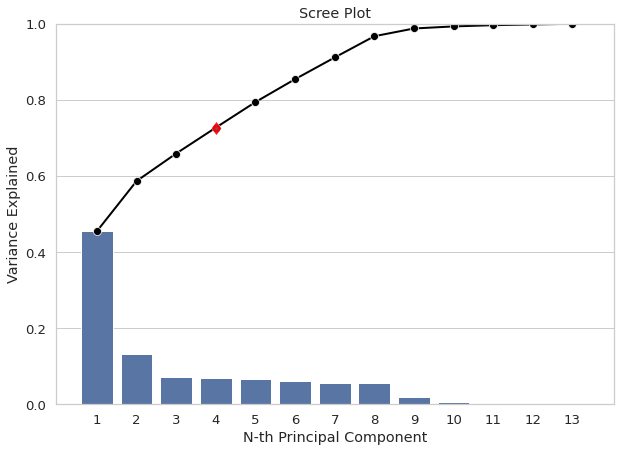

In [19]:
#############################################################
# Visualizar PCA
#############################################################

print(f"""
┌────────────────────────────────────────────────────────┐
│Ejercicio 7 - Graficar importancia de PCA:              │
└────────────────────────────────────────────────────────┘
""")

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = np.arange(pca.n_components_) + 1, 
                y = pca.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = np.arange(pca.n_components_), 
                 y = np.cumsum(pca.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )


_ = sns.lineplot(x = np.arange(pca.n_components_), 
                 y = np.cumsum(pca.explained_variance_ratio_), 
                 linewidth = 0, 
                 markeredgecolor='red',
                 marker = 'd', 
                 alpha=0.9,
                 markeredgewidth=3,
                 markevery=[3],
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

##### Ejercicio 7.1
 *Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%*

In [20]:
#############################################################
# Obtener PCA con 70% de la explicación
#############################################################

# Obervemos el resultado de PCA:
pcSummary = pd.DataFrame({
    'Standard deviation': np.sqrt(pca.explained_variance_),
    'Proportion of variance': pca.explained_variance_ratio_,
    'Cumulative proportion': np.cumsum(pca.explained_variance_ratio_)
})

pcSummary.insert(loc=0, column = 'PC', value = 'PC' + ( 1 + pcSummary.reset_index().index).astype(str))

print(f"""
┌────────────────────────────────────────────────────────┐
│Ejercicio 7.1 - Mostrar PCA que tienen 70%:               │
└────────────────────────────────────────────────────────┘
""")
pcSummary[pcSummary['Cumulative proportion'] <= 0.75]


┌────────────────────────────────────────────────────────┐
│Ejercicio 7.1 - Mostrar PCA que tienen 70%:               │
└────────────────────────────────────────────────────────┘



,PC,Standard deviation,Proportion of variance,Cumulative proportion
0,PC1,2.431856,0.454902,0.454902
1,PC2,1.308634,0.131728,0.586630
2,PC3,0.970556,0.072457,0.659088
3,PC4,0.940161,0.067990,0.727078


Encontramos que para alcanzar el 70%, tenemos que utilizar los primeros 4 PCA.

##### Ejercicio 7.2
*Indica la importancia de las variables en cada componente*


┌────────────────────────────────────────────────────────┐
│Ejercicio 7.2 - Graficar importancia de variable en PCAS: │
└────────────────────────────────────────────────────────┘



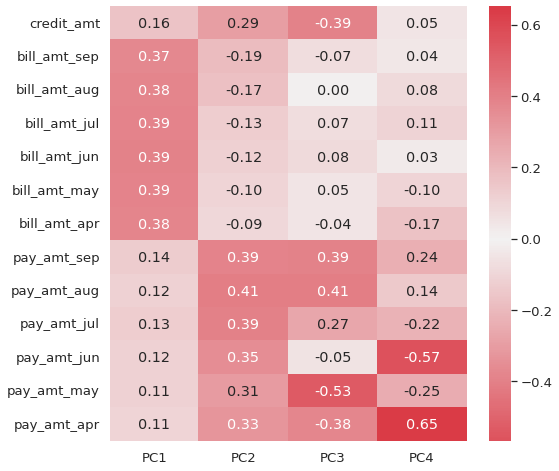

In [21]:
#############################################################
# Visualizar componentes en PCA:
#############################################################

# crear datos del PCA:
pca_data = pd.DataFrame(pca.components_.transpose(),
             columns = pcSummary['PC'].values,
             index = columns_continuous
             )

print(f"""
┌────────────────────────────────────────────────────────┐
│Ejercicio 7.2 - Graficar importancia de variable en PCAS: │
└────────────────────────────────────────────────────────┘
""")

# graficar los primeros PCA:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(
    pca_data[['PC1', 'PC2', 'PC3', 'PC4']], 
    annot=True, 
    fmt='.2f', 
    center=0, 
    cmap=sns.diverging_palette(10, 10, as_cmap=True)
)

Observamos:

* EL PC1 está compuesto principalmente por los datos de pago.

* EL PC2 está compuesto principalmente por los datos de pagos y monto de crédito.

* EL PCA3 es una combinación de pagos, excluyendo Junio y montos de pago.

* EL PCA4 está compuesto principalmente por los pagos, con mayor importancia en Junio y Abril.

##### Ejercicio 8
*Elabora los histogramas de los atributos para visualizar su distribución*

Vamos a relizar los histogramas únicamente para los valores numéricos, incluyendo los datos de edad. Debemos recordar que estos datos ya están normalizados en nuestra variable X_new que usamos para el PCA, podemos sin embargo regresar usar nuevamente nuestro transformer na que solo remueve los nulos y no escala, esto para ver mejor los histogramas.

In [22]:
#############################################################
# Crear nuevamente X_new para datos numericos sin normalizar
#############################################################

X_transformer = ct_na.fit(X)
X_new = pd.DataFrame(X_transformer.transform(X), columns=columns_category + columns_numeric)


┌────────────────────────────────────────────────────────┐
│Ejercicio 8 - Graficar Credit Amount:                   │
└────────────────────────────────────────────────────────┘



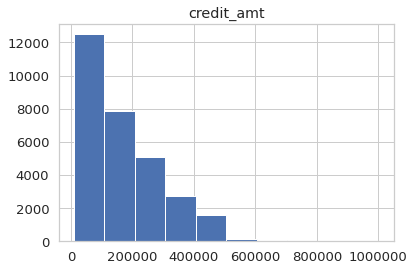

In [23]:
#############################################################
# Graficar Credit Amount:
#############################################################
print(f"""
┌────────────────────────────────────────────────────────┐
│Ejercicio 8 - Graficar Credit Amount:                   │
└────────────────────────────────────────────────────────┘
""")
fig, ax = plt.subplots()
X_new[['credit_amt']].hist(ax=ax)
plt.show()

La mayoría de los créditos son bajos, es raro observar créditos por encima de 500,000


┌────────────────────────────────────────────────────────┐
│Ejercicio 8 - Graficar Age:                             │
└────────────────────────────────────────────────────────┘



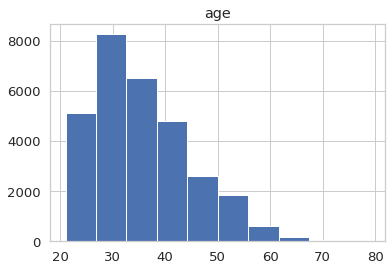

In [24]:
#############################################################
# Graficar Age:
#############################################################
print(f"""
┌────────────────────────────────────────────────────────┐
│Ejercicio 8 - Graficar Age:                             │
└────────────────────────────────────────────────────────┘
""")
fig, ax = plt.subplots()
X_new[['age']].hist(ax=ax)
plt.show()

La mayoría de los clientes se encuentra por los 30 años


┌────────────────────────────────────────────────────────┐
│Ejercicio 8 - Graficar estados de cuenta:               │
└────────────────────────────────────────────────────────┘



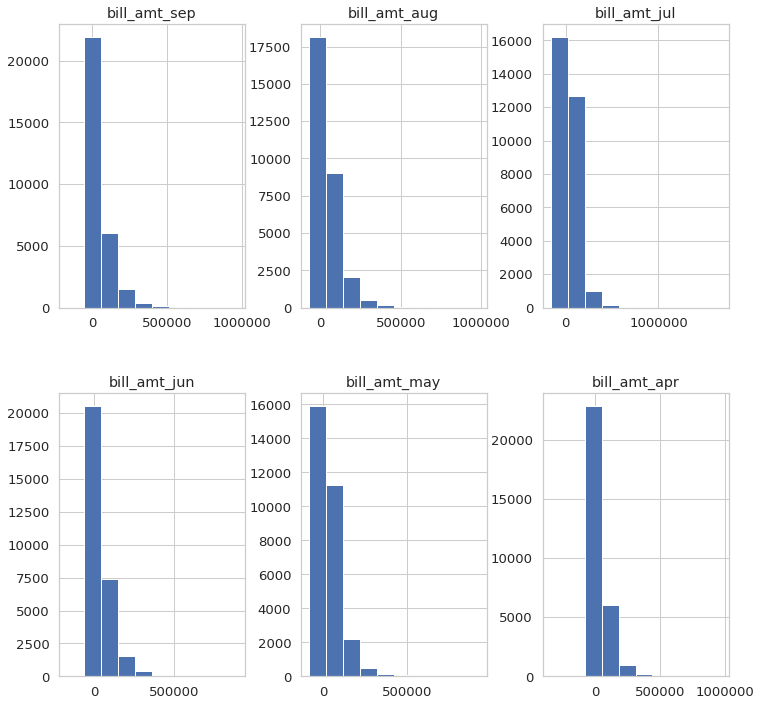

In [25]:
#############################################################
# Graficar estados de cuenta:
#############################################################
print(f"""
┌────────────────────────────────────────────────────────┐
│Ejercicio 8 - Graficar estados de cuenta:               │
└────────────────────────────────────────────────────────┘
""")
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12, 12))
X_new[['bill_amt_sep','bill_amt_aug','bill_amt_jul','bill_amt_jun','bill_amt_may','bill_amt_apr']].hist(ax = ax)
plt.show()

Los estados de cuenta responden a lo observado en los montos de crédito, situación esperada


┌────────────────────────────────────────────────────────┐
│Ejercicio 8 - Graficar pagos:                           │
└────────────────────────────────────────────────────────┘



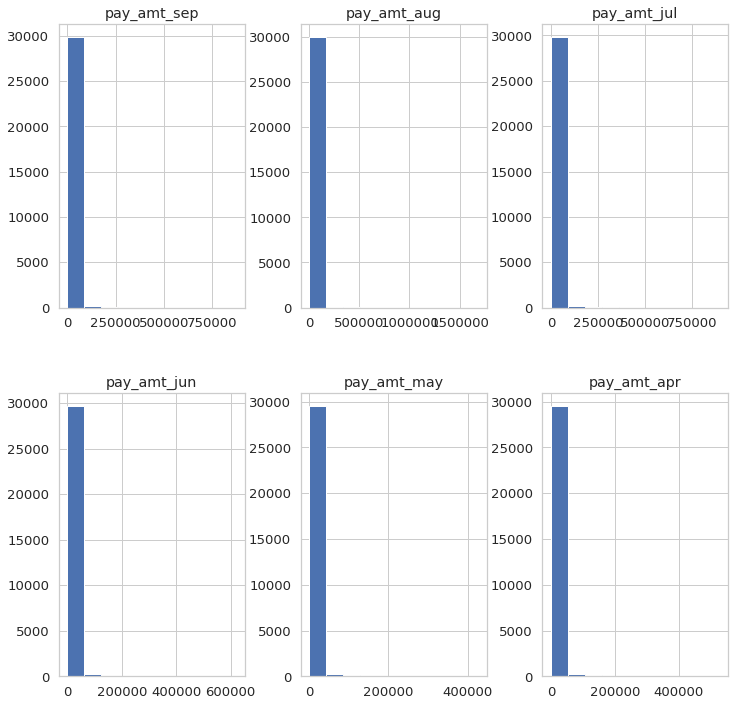

In [26]:
#############################################################
# Graficar pagos:
#############################################################
print(f"""
┌────────────────────────────────────────────────────────┐
│Ejercicio 8 - Graficar pagos:                           │
└────────────────────────────────────────────────────────┘
""")
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12, 12))
X_new[['pay_amt_sep','pay_amt_aug','pay_amt_jul','pay_amt_jun','pay_amt_may','pay_amt_apr']].hist(ax = ax)
plt.show()

La mayoría d elos pagos como habiamos visto se encuentran dentro de los 5k, estas gráficas probablemente necesiten una transformación para observar a mejor detalle; sin embargo, cumplen con lo observado cuando usamos describe.

##### Ejercicio 9
*Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.*

Comenzaremos con boxplots de los pagos, en particular queremos ver cuando removemos los outliers, como se comportan en comparación mes con mes para corroborar si existe o no comportamiento relativamente normal, para esto usaremos ShowFilters=False.


┌────────────────────────────────────────────────────────┐
│Ejercicio 9 - Boxplot sin outliers:                     │
└────────────────────────────────────────────────────────┘



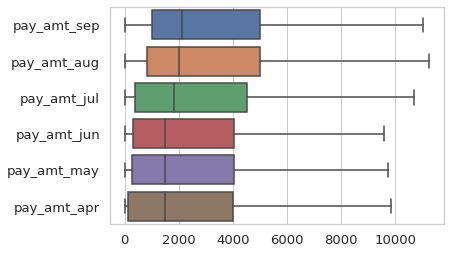

In [27]:
#############################################################
# Boxplot sin outlier de pagos:
#############################################################

sns.boxplot(
    data=X_new[['pay_amt_sep', 'pay_amt_aug', 'pay_amt_jul', 'pay_amt_jun', 'pay_amt_may', 'pay_amt_apr']],
    orient="h",
    showfliers=False
)
print(f"""
┌────────────────────────────────────────────────────────┐
│Ejercicio 9 - Boxplot sin outliers:                     │
└────────────────────────────────────────────────────────┘
""")
plt.show()

Podríamos también tratar de ver si existe una relación entre la edad y el monto de crédito otorgado


┌────────────────────────────────────────────────────────┐
│Ejercicio 9 - JoinPLot:                                 │
└────────────────────────────────────────────────────────┘



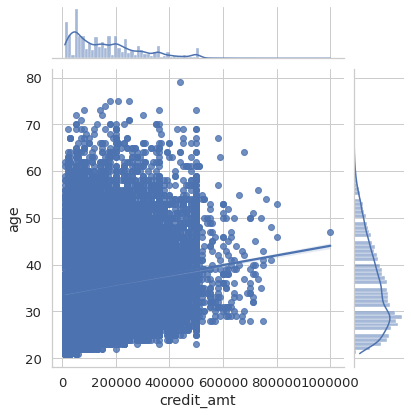

In [28]:
#############################################################
# Comparación edad y monto de crédito
#############################################################
print(f"""
┌────────────────────────────────────────────────────────┐
│Ejercicio 9 - JoinPLot:                                 │
└────────────────────────────────────────────────────────┘
""")
sns.jointplot(data=X_new, x="credit_amt", y="age", kind="reg")

Analicemos además si el nivel educativo tiene que ver con la probabilidad de impago.


┌────────────────────────────────────────────────────────┐
│Ejercicio 9 - Barplot:                                  │
└────────────────────────────────────────────────────────┘



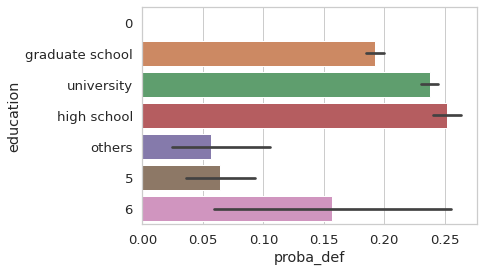

In [29]:
#############################################################
# # Nivel educativo y probabilidad de pago:
#############################################################
print(f"""
┌────────────────────────────────────────────────────────┐
│Ejercicio 9 - Barplot:                                  │
└────────────────────────────────────────────────────────┘
""")
ax = sns.barplot(data=df, x="proba_def", y="education", orient="h")
ax.set_yticklabels(['0', 'graduate school', 'university', 'high school', 'others', '5', '6'])
plt.show()

##### Ejercicio 10
*Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.*

**Primer gráfico - Boxplot de pagos**

El primer gráfico confirma parte de lo observado en PCA y en el análisis de las tendencias centrales que hizimos con el método describe en el dataset inicial, cuando removemos los outliers vemos los comportamientos normales de las gráficas y esto se puede ampliar para otros métodos para entenderlas mejor, ya que este dataset cuenta con bastantes outliers; lo que confirmamos cuando vimos los máximos.


**Segundo gráfico - Join plot de crédito vs. edad**

La intuición nos dice que a mayor edad, mayor capacidad financiera y por lo tanto crediticia, esto es parcialmente confirmado ya que también observamos otras combinaciones. Quizás utilizar métodos como crear grupos en las edades y los montos de créditos permita ver esto de mejor manera, se podría recomendar hacer esto por pipelines para nuevos modelados.

**Tercer gráfico - Barplot de impago vs. nivel educativo**

Este método es probablemente uno de los que ofrezca mayores insights para segregar en varios modelos, el tomar variables objetivo vs. categorias es un método naturalmente intuitivo para entender los fenómenos. Este tipo de análisis lo podemos aumentar al utilizar pruebas ANOVA para ver si existe diferencia en las medias, estos insights puede ayudar a dar dirección al modelo e incluso es un método común para tomar decisiones rápidas.

La expansión de esta metodologia se puede hacer por creación de grupos "binarization" o métodos como k-means para crear nuevas categorias, esto sirve en un sentido similar a PCA, ya que nos ayuda a entender más datos con menos.